In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
# Deep Learning Libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier  # Use this instead of legacy keras.wrappers

In [73]:
# Digit MNIST Dataset. (Input Columns Exists as Unflattened (28x28))
(X_Train, Y_Train), (X_Test, Y_Test) = mnist.load_data()

In [75]:
print(f"Number of Rows and Columns of X_Train (Before Reshaped):{X_Train.shape}")
print(f"Number of Rows and Columns of Y_Train (Before Reshaped):{Y_Train.shape} \n")

print(f"Number of Rows and Columns of X_Test (Before Reshaped):{X_Test.shape}")
print(f"Number of Rows and Columns of Y_Test (Before Reshaped):{Y_Test.shape}")

Number of Rows and Columns of X_Train (Before Reshaped):(60000, 28, 28)
Number of Rows and Columns of Y_Train (Before Reshaped):(60000,) 

Number of Rows and Columns of X_Test (Before Reshaped):(10000, 28, 28)
Number of Rows and Columns of Y_Test (Before Reshaped):(10000,)


In [77]:
# Flattening the Rows and Columns (From 3D TO 3D With One Layer), Since CNN Accepts Only 2 Dimensional Inputs With X No.Of Layers

X_Train_Two_Dimension_With_One_Layer = X_Train.reshape(X_Train.shape[0], 28, 28, 1)
print(f"Number of Rows and Columns of X_Train_Two_Dimension_With_One_Layer (After Reshaped) :{X_Train_Two_Dimension_With_One_Layer.shape}")

X_Test_Two_Dimension_With_One_Layer = X_Test.reshape(X_Test.shape[0], 28, 28, 1)
print(f"Number of Rows and Columns of X_Test_Two_Dimension_With_One_Layer (After Reshaped) :{X_Test_Two_Dimension_With_One_Layer.shape}")

Number of Rows and Columns of X_Train_Two_Dimension_With_One_Layer (After Reshaped) :(60000, 28, 28, 1)
Number of Rows and Columns of X_Test_Two_Dimension_With_One_Layer (After Reshaped) :(10000, 28, 28, 1)


In [79]:
# Defining Datatypes as Float for Input
X_Train = X_Train_Two_Dimension_With_One_Layer.astype('float32')
X_Test = X_Test_Two_Dimension_With_One_Layer.astype('float32')

In [81]:
# Dividing (X_Train = X_Train / 255) and Storing Back to X_Train
# 255 Refers to the Color Scale = 0 To 255 in RGB Channels

X_Train /= 255
X_Train /= 255

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

No_Of_Filters = 28
Input_Shape = (28, 28, 1)
Dense_Output_01 = 128
Output = 10 

# Convolutional Processing :
model = Sequential()
model.add(Conv2D(No_Of_Filters, kernel_size=(3,3), input_shape = Input_Shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Neural Networking :
model.add(Dense(Dense_Output_01, activation=tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(Output, activation=tf.nn.softmax))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [89]:
# Compiling the model
Compiled_Model = model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

In [91]:
Fitted_Model = model.fit(X_Train, Y_Train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.5567 - accuracy: 0.8325
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2110 - accuracy: 0.9367
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1543 - accuracy: 0.9542
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1272 - accuracy: 0.9613
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1098 - accuracy: 0.9670
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0976 - accuracy: 0.9700
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0798 - accuracy: 0.9752
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0750 - accuracy: 0.9765
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [93]:
Evaluated_Model = model.evaluate(X_Test, Y_Test)

313/313 [==============================] - 2s 6ms/step - loss: 3355.1553 - accuracy: 0.9759


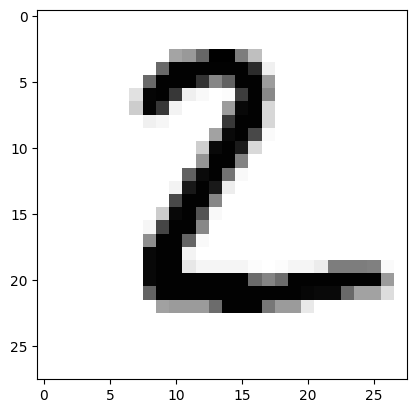

In [97]:
# Confusion Matrix for Digit MNIST
import matplotlib.pyplot as plt
import seaborn as sns

Image_Index = 1 # Whatever the Number can be given Within 10,000

plt.imshow(X_Test[Image_Index].reshape(28, 28), cmap='Greys')

In [99]:
Image_Input = X_Test[Image_Index].reshape(28,28)
Predicted = model.predict(X_Test[Image_Index].reshape(1, 28, 28, 1))
print(f"Predicted Digit From X_Test Input Is ({Predicted.argmax()})")

1/1 [==============================] - 0s 109ms/step
Predicted Digit From X_Test Input Is (2)
